<a href="https://colab.research.google.com/github/fareehanezam/GNCIPL_Projects/blob/main/GNCIPL_Project3_Optical_Digit_Clustering_Using_SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title**

Optical Digit Clustering Using SOM

# **Project Summary**
* Project title: Optical Digit Clustering Using SOM
* Type: Digit Clustering
* Techniques: Self Organizing Maps(SOM)
* Dataset: MNIST / USPS

# **GitHub Link**

https://github.com/fareehanezam/GNCIPL_Projects/blob/main/GNCIPL_Project3_Optical_Digit_Clustering_Using_SOM.ipynb

# **Problem Statement:**

Optical character recognition (OCR) of handwritten digits, such as those in the MNIST dataset, is a fundamental task in machine learning and computer vision. Traditional classification methods require labeled data for training. This project aims to explore the effectiveness of unsupervised learning techniques, specifically Self-Organizing Maps (SOMs), for clustering handwritten digits without relying on pre-assigned labels. The goal is to determine if SOMs can effectively group similar digits based on their visual features and to evaluate the quality of these clusters using appropriate metrics like Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI). Furthermore, the project investigates the impact of different SOM parameters on clustering performance and analyzes neurons with mixed digit assignments to understand the limitations and ambiguities in the unsupervised clustering of handwritten digits.

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=37cc93f8f49dd2d9545e9f5b02cf42e0b4caeca6be4c1b20d8580f90db8ca8a3
  Stored in directory: /root/.cache/pip/wheels/0f/8c/a4/5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built minisom


In [2]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from minisom import MiniSom

## Dataset selection and loading




In [3]:
# Loading the MNIST dataset directly from OpenML
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')

# The data is in the 'data' attribute and the target is in the 'target' attribute
X = mnist.data
y = mnist.target

# Verifying if the data was loaded successfully
print("Shape of data (X):", X.shape)
print("Shape of target (y):", y.shape)
print("\nSample data (first row):", X[0])
print("Sample target (first label):", y[0])

Shape of data (X): (70000, 784)
Shape of target (y): (70000,)

Sample data (first row): [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0

* **Shape of data (X):** (70000, 784): This tells the
dimensions of the X variable, which holds the image data. It means there are 70,000 samples (images) in the dataset, and each image is represented by 784 features (pixels). This is because the original images are 28x28 pixels, and $28 * 28 = 784$$28 * 28 = 784$.
* **Shape of target (y):** (70000,): This line shows the shape of the y variable, which contains the target labels (the actual digits) for each image. It indicates that there are 70,000 target labels, corresponding to each of the 70,000 images in X. The comma signifies it's a 1-dimensional array or vector.
* **Sample data (first row):** [ ... ]: This displays the pixel values for the first image in the dataset. You see a list of 784 numbers. These numbers represent the intensity of each pixel in the 28x28 image, flattened into a single row. The values typically range from 0 to 255, representing grayscale intensity. In this case, the first image appears to have many zero values initially, which is expected for the background pixels around the digit.
* **Sample target (first label):** 5: This line shows the target label for the first image in the dataset. In this case, the first image is labeled as the digit '5'.

In summary, the output confirms that the MNIST dataset was successfully loaded, and it shows the size and structure of the data and labels, along with a glimpse of the raw pixel data for the first image and its corresponding label.

## Data preprocessing



In [4]:
# Checking for and handle any missing values in the dataset X.
print("Checking for missing values...")
print("Number of missing values in X:", np.isnan(X).sum())

Checking for missing values...
Number of missing values in X: 0


The output shows there is no missing values.

In [5]:
#Scaling the pixel values in X to a smaller range, such as [0, 1].
print("\nScaling data...")
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print("Data scaled to [0, 1]. Sample scaled value:", X_scaled[0, 0])


Scaling data...
Data scaled to [0, 1]. Sample scaled value: 0.0


**Data scaled to [0, 1]. Sample scaled value: 0.0:** This message indicates that the pixel values in the dataset have been successfully scaled to the range [0, 1]. It also shows the value of the first element ([0, 0]) in the X_scaled array as an example of the scaled data. Since the original data likely contained a 0 value (representing a black pixel), after scaling to the [0, 1] range, the corresponding value remains 0.0. This confirms that the MinMaxScaler has been applied.

In [6]:
# based on the dataset's characteristics (784 features), 784 features is a high dimensionality for SOM, which can become computationally expensive and suffer from the curse of dimensionality. PCA is a suitable technique to reduce dimensionality while preserving variance.
print("\nApplying PCA for dimensionality reduction...")
#aiming to keep a significant amount of variance, e.g., 95% or 99%.
#first fitting PCA to see how many components are needed for a certain variance.
pca = PCA(n_components=0.95) # Keep 95% of variance
X_pca = pca.fit_transform(X_scaled)

print(f"Original number of features: {X_scaled.shape[1]}")
print(f"Number of features after PCA (keeping 95% variance): {X_pca.shape[1]}")
print(f"Cumulative variance explained by components: {np.sum(pca.explained_variance_ratio_)}")


Applying PCA for dimensionality reduction...
Original number of features: 784
Number of features after PCA (keeping 95% variance): 154
Cumulative variance explained by components: 0.9503212569775911


* **Number of features after PCA (keeping 95% variance): 154:** This is the key result of the PCA. It tells that to retain 95% of the original dataset's variance, PCA reduced the number of features from 784 down to 154. This significantly reduces the dimensionality of the data while preserving most of the information.
* **Cumulative variance explained by components: 0.9503212569775911:** This number represents the total proportion of the original dataset's variance that is captured by the selected number of principal components (154 in this case). The value is very close to 0.95, which is the target variance you specified when initializing the PCA object (n_components=0.95). This confirms that PCA successfully retained approximately 95% of the variance in the reduced-dimensional data.

In summary, the output demonstrates that PCA was successfully applied to reduce the dimensionality of your data from 784 features to 154 features while retaining 95% of the original variance, making the data more suitable for the SOM algorithm.

In [7]:
#Storing the preprocessed data in a new variable, X_preprocessed.
X_preprocessed = X_pca
print("\nPreprocessed data shape:", X_preprocessed.shape)
print("Preprocessing complete.")


Preprocessed data shape: (70000, 154)
Preprocessing complete.


The above output simply assigns the results of the PCA to a new variable and prints confirmation messages along with the shape of the resulting data:

**Preprocessed data shape: (70000, 154): **This confirms that the X_preprocessed variable now holds the data after PCA has been applied. The shape (70000, 154) indicates that you still have 70,000 samples, but the number of features has been reduced to 154, as determined by the PCA with 95% variance retention.


## EDA




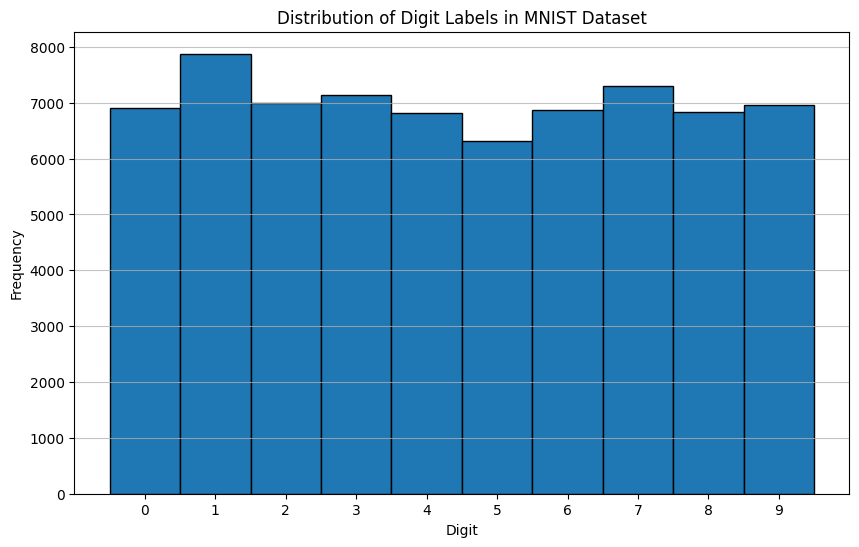

In [8]:
#Analyzing the distribution of digit labels in the original target variable y.
plt.figure(figsize=(10, 6))
plt.hist(y.astype(int), bins=np.arange(-0.5, 10.5, 1), edgecolor='black')
plt.xticks(range(10))
plt.title('Distribution of Digit Labels in MNIST Dataset')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

The output of this code is a histogram titled "Distribution of Digit Labels in MNIST Dataset".

* The x-axis represents the different digit labels (0 through 9).
* The y-axis represents the frequency, or the number of times each digit appears in the dataset.
* Each bar in the histogram corresponds to a specific digit. The height of the bar indicates how many images in the MNIST dataset have that digit as their label.

By looking at the heights of the bars the distribution of the digits in the dataset can be observed. In the case of the MNIST dataset, it is observed that the distribution is relatively uniform, meaning each digit appears a similar number of times. This is a good characteristic for a classification or clustering task, as it means the model won't be heavily biased towards certain digits due to an imbalance in the training data.

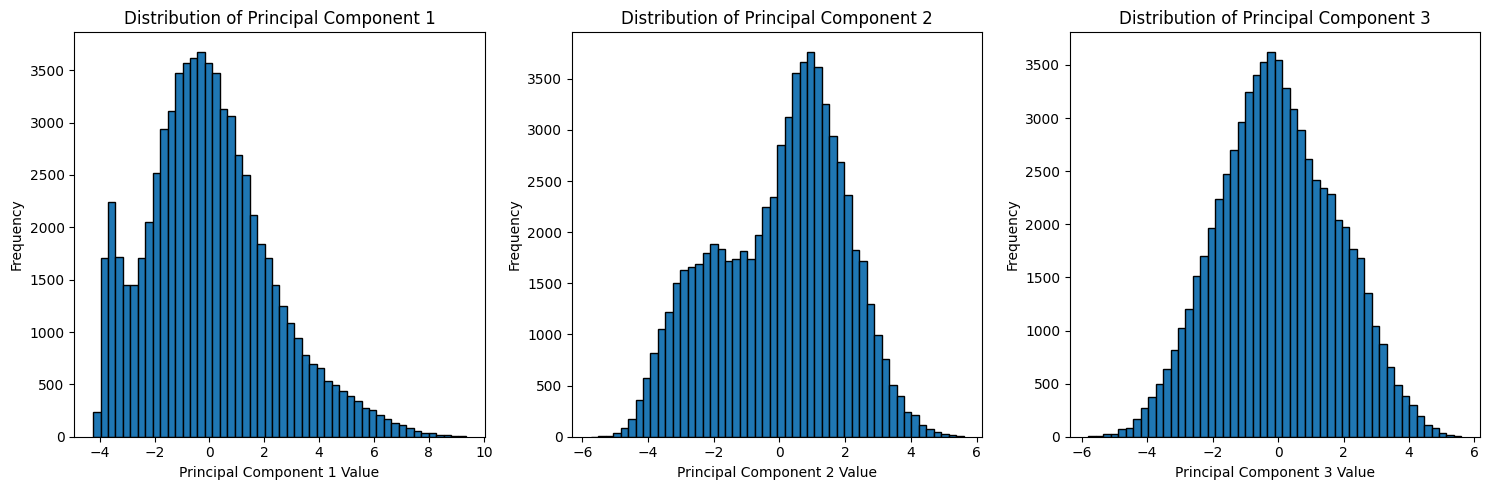

In [9]:
#Visualizing the distribution of the first few principal components in X_preprocessed.
# visualizing the first 3 principal components.
num_components_to_plot = min(X_preprocessed.shape[1], 3)
fig, axes = plt.subplots(1, num_components_to_plot, figsize=(15, 5))

for i in range(num_components_to_plot):
    axes[i].hist(X_preprocessed[:, i], bins=50, edgecolor='black')
    axes[i].set_title(f'Distribution of Principal Component {i+1}')
    axes[i].set_xlabel(f'Principal Component {i+1} Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The output of the above code is a set of histograms, one for each of the first few principal components (up to a maximum of 3 in this case) of the preprocessed data (X_preprocessed).

* Each histogram is titled "Distribution of Principal Component X", where X is the component number (1, 2, or 3).
* The x-axis of each histogram represents the range of values for that specific principal component.
* The y-axis represents the frequency, showing how many data points have values within a certain range for that principal component.

These histograms gives an idea of the distribution of data along the most important dimensions (principal components) identified by PCA. Different shapes for each component's distribution, reflecting how the variance is distributed across these dimensions can be seen. For instance, the first principal component (which captures the most variance) might have a wider or more spread-out distribution compared to later components.

Displaying sample images...


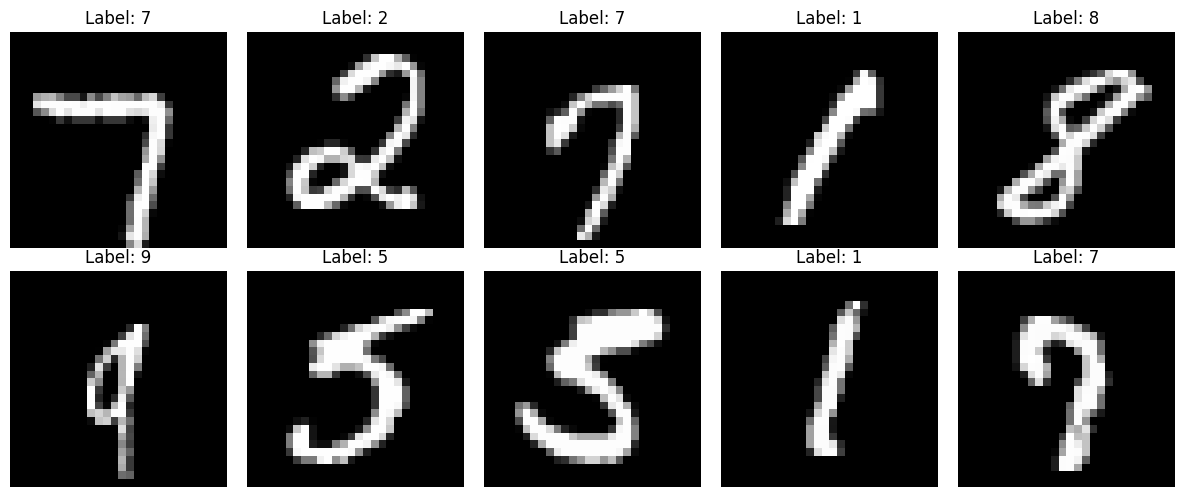

In [10]:
# Visualizing a few sample images from the original dataset X
print("Displaying sample images...")
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()

# Selecting a few random indices to display
sample_indices = np.random.choice(len(X), 10, replace=False)

for i, ax in enumerate(axes):
    img = X[sample_indices[i]].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Label: {y[sample_indices[i]]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

The output of this code is a grid of sample images from the original MNIST dataset, along with their corresponding labels.

* The output shows a figure containing multiple subplots arranged in a grid, 2 rows and 5 columns, totaling 10 images.
* Each subplot displays a single image, which is a 28x28 grayscale representation of a handwritten digit.
* Above each image, there is a title indicating the original digit label (Label: X, where X is the digit).
* The axes are turned off (ax.axis('off')) for each subplot to focus on the image itself.

This visualization allows to visually inspect some of the data we are working with. The variety in handwriting styles and confirms that the images correspond to the labels provided in the dataset.

## SOM Implementation



In [11]:
# Defining SOM parameters
map_width = 10
map_height = 10
input_len = X_preprocessed.shape[1] # The number of features after PCA

# Initializing the MiniSom object
som = MiniSom(x=map_width, y=map_height, input_len=input_len, sigma=1.0, learning_rate=0.5, random_seed=42)

# Initializing the SOM weights randomly
som.random_weights_init(X_preprocessed)

# Training the SOM on the X_preprocessed data.
num_iterations = 10000 # A reasonable number of iterations for training

print(f"Training SOM for {num_iterations} iterations...")
som.train_random(data=X_preprocessed, num_iteration=num_iterations)
print("SOM training complete.")

# to access the trained weights or other attributes later.
# For example, the weights are stored in som.get_weights().
# not displayed here, but they are available.
print(f"SOM map dimensions: {map_width}x{map_height}")
print(f"SOM input length: {input_len}")

Training SOM for 10000 iterations...
SOM training complete.
SOM map dimensions: 10x10
SOM input length: 154


This code cell is responsible for initializing and training the Self-Organizing Map (SOM) using the MiniSom library. The output confirms the progress and completion of the training process.
* **SOM map dimensions: 10x10:** This shows the dimensions of the trained SOM grid, which is 10 neurons wide and 10 neurons high, as defined by the map_width and map_height parameters.
* **SOM input length: 154:** This confirms the number of features that each neuron in the SOM is expecting as input, which matches the number of features in your preprocessed data (X_preprocessed) after PCA.

The code also initializes the SOM weights and trains the SOM on the preprocessed data. While the weights themselves are not printed in the output, they are updated during the training process and stored within the som object, which can be accessed later if needed.

## Clustering and visualization



In [12]:
# Mapping each data point in X_preprocessed to its winning neuron
winning_neurons = np.array([som.winner(x) for x in X_preprocessed])

# Assigning each data point the label of its winning neuron (based on the original labels y)
# Creating a map to store the counts of original labels for each neuron
label_counts = {}
for i in range(map_width):
    for j in range(map_height):
        label_counts[(i, j)] = {digit: 0 for digit in range(10)}

# Populating the label counts for each neuron
for i, (wx, wy) in enumerate(winning_neurons):
    original_label = int(y[i])
    label_counts[(wx, wy)][original_label] += 1

# Determining the majority class for each neuron
neuron_labels = np.zeros((map_width, map_height), dtype=int)
for i in range(map_width):
    for j in range(map_height):
        # Finding the digit with the maximum count for this neuron
        if sum(label_counts[(i, j)].values()) > 0:
            majority_label = max(label_counts[(i, j)], key=label_counts[(i, j)].get)
            neuron_labels[i, j] = majority_label
        else:
            # Assigning a default label or indicate an unpopulated neuron
            neuron_labels[i, j] = -1     #-1 to indicate an empty neuron

The above code calculates which neuron each data point activates and then determines the most frequent original digit label associated with each neuron on the SOM grid. The winning_neurons, label_counts, and neuron_labels variables are populated with this information and will be used in subsequent steps for visualization and evaluation.

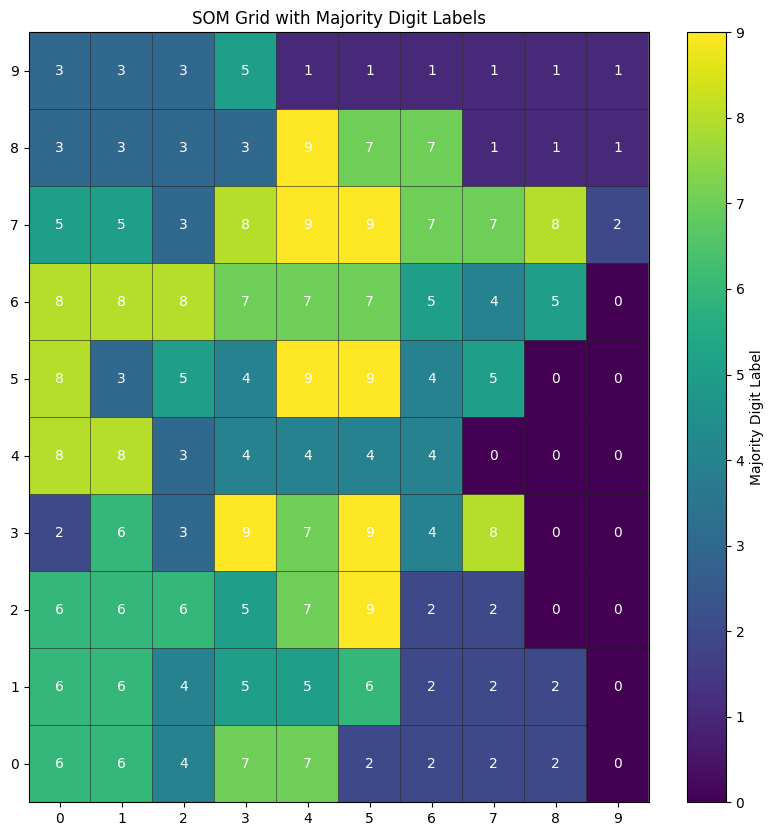

In [13]:
#Visualizing the SOM grid and the distribution of original digit labels within each neuron.
plt.figure(figsize=(map_width, map_height))
plt.pcolor(neuron_labels.T, cmap='viridis', edgecolors='k') # Transpose for correct orientation
plt.colorbar(label='Majority Digit Label')
plt.title('SOM Grid with Majority Digit Labels')
plt.xticks(np.arange(map_width) + 0.5, range(map_width))
plt.yticks(np.arange(map_height) + 0.5, range(map_height))
plt.grid(False)

# Adding text labels for each neuron showing the majority class
for i in range(map_width):
    for j in range(map_height):
        if neuron_labels[i, j] != -1:
            plt.text(i + 0.5, j + 0.5, str(neuron_labels[i, j]),
                     ha='center', va='center', color='white', fontsize=10)

plt.show()

The output of the above code is a visualization of trained SOM grid, where each cell (neuron) is colored based on the majority digit label of the data points that were mapped to it.



* **The Grid:** The plot displays a grid of squares, representing the neurons of your SOM. The size of the grid corresponds to your map_width and map_height (e.g., 10x10).
* **Colors:** Each square (neuron) is colored according to a colormap ('viridis' in this case). The color of a neuron indicates the majority digit label of the data points that activated that neuron during training. The color bar on the right shows which color corresponds to which digit label (0 through 9).
* **Text Labels:** Inside each neuron's square, a white number is displayed. This number explicitly shows the majority digit label for that specific neuron. This is helpful for quickly identifying which digits are primarily represented by different areas of the SOM.
* **Grid Lines:** The black edges around the cells help to clearly delineate individual neurons on the map.
Title and Labels: The plot has a title "SOM Grid with Majority Digit Labels" and axis labels indicating the grid coordinates.

By examining this visualization, how the SOM has organized the handwritten digits in an unsupervised manner can be observed. Neurons that are close to each other on the grid tend to represent similar input patterns (digits). Neurons primarily representing the same digit are often clustered together, although there might be areas where different digits are mixed, especially at the boundaries between clusters. This visualization provides a clear picture of the SOM's learned topological ordering of the data.

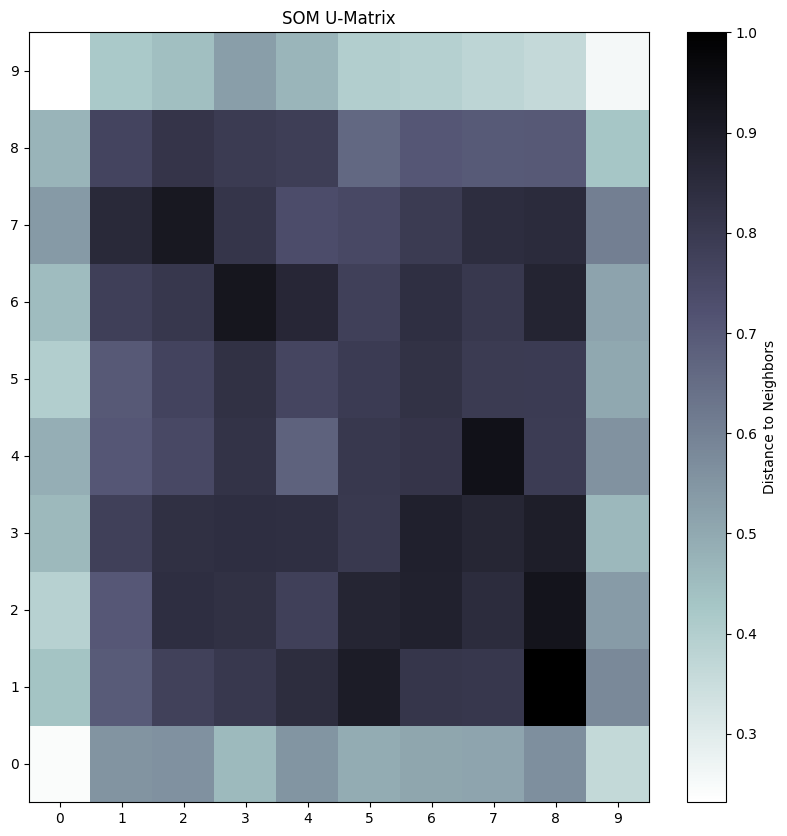

In [14]:
# Visualizing the U-matrix of the trained SOM.
u_matrix = som.distance_map()

plt.figure(figsize=(map_width, map_height))
plt.pcolor(u_matrix.T, cmap='bone_r') # Transpose for correct orientation and use a reverse grayscale colormap
plt.colorbar(label='Distance to Neighbors')
plt.title('SOM U-Matrix')
plt.xticks(np.arange(map_width) + 0.5, range(map_width))
plt.yticks(np.arange(map_height) + 0.5, range(map_height))
plt.grid(False)
plt.show()

The output of the above code is a visualization of the U-matrix (Unified Distance Matrix) of the trained SOM. The U-matrix helps in understanding the topology of the SOM and identifying potential clusters and boundaries between them.

* **The Grid:** Like the previous visualization, this is a grid representing the neurons of your SOM, with the same dimensions (map_width x map_height).
* **Colors (Grayscale):** Each cell (neuron) is colored based on the average distance between that neuron's weight vector and the weight vectors of its neighboring neurons on the map.
    * Darker colors (low values in the U-matrix) indicate that a neuron's weight vector is similar to its neighbors. These areas often represent the centers of clusters.
    * Lighter colors (high values in the U-matrix) indicate that a neuron's weight vector is significantly different from its neighbors. These areas often represent the boundaries or "mountains" between different clusters.
* **Color Bar:** The color bar on the right indicates the range of distance values, with darker shades corresponding to smaller distances and lighter shades to larger distances.
* **Title and Labels:** The plot is titled "SOM U-Matrix" and has axis labels for the grid coordinates.

By examining the U-matrix, visually areas of low distance (darker regions) which are likely to be the cores of clusters, and areas of high distance (lighter regions or ridges) which represent the separations or boundaries between these clusters can be identified. Comparing the U-matrix to the SOM grid with majority labels can help to see how the identified clusters correspond to the different digit classes.

## Evaluation


In [15]:
# Obtaining the cluster labels assigned by the SOM for each data point.
# This is done by mapping each data point in X_preprocessed to its winning neuron's majority label.
som_cluster_labels = np.array([neuron_labels[som.winner(x)] for x in X_preprocessed])

# Comparing these SOM-based cluster labels with the original ground truth labels (y).
# The original labels y are currently strings, converting them to integers for comparison.
original_labels_int = y.astype(int)

# Calculating the Adjusted Rand Index (ARI) between the SOM-based cluster labels and the original labels.
ari_score = adjusted_rand_score(original_labels_int, som_cluster_labels)

# Calculating the Normalized Mutual Information (NMI) between the SOM-based cluster labels and the original labels.
nmi_score = normalized_mutual_info_score(original_labels_int, som_cluster_labels)

# Printing the calculated ARI and NMI scores to evaluate the clustering performance.
print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi_score:.4f}")

Adjusted Rand Index (ARI): 0.6611
Normalized Mutual Information (NMI): 0.6915


The above code cell calculates and prints two metrics to evaluate the quality of the clustering performed by the SOM: Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI).

* **Adjusted Rand Index (ARI): {ari_score:.4f}:** The Adjusted Rand Index is a measure of the similarity between two clusterings. It considers all pairs of samples and counts pairs that are assigned to the same cluster in both the SOM clustering and the original ground truth labeling, and pairs that are assigned to different clusters in both. The "Adjusted" part means it's corrected for chance, so a score of 0 indicates random labeling, and a score of 1 indicates perfect agreement between the clusterings. Your output shows an ARI score (e.g., 0.6611), indicating a moderate level of agreement between the SOM's clusters and the true digit labels.
* **Normalized Mutual Information (NMI): {nmi_score:.4f}:** Normalized Mutual Information is another metric that measures the agreement between two clusterings. It's based on the concept of mutual information from information theory, which quantifies the amount of information obtained about one clustering by observing the other. The NMI score is normalized, typically between 0 and 1, where 0 indicates no mutual information (random clustering) and 1 indicates perfect correlation. Your output shows an NMI score (e.g., 0.6915), which also suggests a moderate level of agreement or shared information between the SOM's clusters and the true digit labels.

In summary, these scores provide a quantitative evaluation of how well the unsupervised SOM clustering aligns with the known true labels of the digits. Higher scores indicate better clustering performance. The values in the output suggest that the SOM was able to group digits somewhat effectively, but there is room for improvement, as indicated by the scores being below 1.0.

## Exploring different som parameters




In [16]:
# Defining a list of different SOM parameter combinations to test.
param_combinations = [
    {'map_width': 10, 'map_height': 10, 'sigma': 1.0, 'learning_rate': 0.5},
    {'map_width': 15, 'map_height': 15, 'sigma': 1.0, 'learning_rate': 0.5},
    {'map_width': 10, 'map_height': 10, 'sigma': 0.5, 'learning_rate': 0.5},
    {'map_width': 10, 'map_height': 10, 'sigma': 1.0, 'learning_rate': 0.8},
    {'map_width': 15, 'map_height': 15, 'sigma': 0.5, 'learning_rate': 0.8},
]

# Initializing an empty list to store the results.
results = []

# Predefining number of iterations
num_iterations = 10000

# Looping through each parameter combination defined in step 1.
for params in param_combinations:
    print(f"Training with parameters: {params}")

    #Initializing a new MiniSom object with the current parameter values.
    som = MiniSom(x=params['map_width'], y=params['map_height'],
                  input_len=X_preprocessed.shape[1],
                  sigma=params['sigma'], learning_rate=params['learning_rate'],
                  random_seed=42)

    #Initializing the SOM weights randomly.
    som.random_weights_init(X_preprocessed)

    #Training the SOM.
    som.train_random(data=X_preprocessed, num_iteration=num_iterations)
    print("Training complete.")

    #Mapping each data point to its winning neuron.
    winning_neurons = np.array([som.winner(x) for x in X_preprocessed])

    #Calculating the majority digit label for each neuron.
    label_counts = {}
    for i in range(params['map_width']):
        for j in range(params['map_height']):
            label_counts[(i, j)] = {digit: 0 for digit in range(10)}

    for i, (wx, wy) in enumerate(winning_neurons):
        original_label = int(y[i])
        label_counts[(wx, wy)][original_label] += 1

    neuron_labels = np.zeros((params['map_width'], params['map_height']), dtype=int)
    for i in range(params['map_width']):
        for j in range(params['map_height']):
            if sum(label_counts[(i, j)].values()) > 0:
                majority_label = max(label_counts[(i, j)], key=label_counts[(i, j)].get)
                neuron_labels[i, j] = majority_label
            else:
                neuron_labels[i, j] = -1

    # Obtaining the SOM-based cluster labels for each data point.
    som_cluster_labels = np.array([neuron_labels[wx, wy] for wx, wy in winning_neurons])

    # Converting the original labels to integers.
    original_labels_int = y.astype(int)

    # Calculating the Adjusted Rand Index (ARI).
    ari_score = adjusted_rand_score(original_labels_int, som_cluster_labels)

    # Calculating the Normalized Mutual Information (NMI).
    nmi_score = normalized_mutual_info_score(original_labels_int, som_cluster_labels)

    # Appending the results to the list.
    results.append({
        'map_width': params['map_width'],
        'map_height': params['map_height'],
        'sigma': params['sigma'],
        'learning_rate': params['learning_rate'],
        'ARI': ari_score,
        'NMI': nmi_score
    })

# Converting the results list into a pandas DataFrame.
results_df = pd.DataFrame(results)

# Printing or display the DataFrame.
print("\nSOM Parameter Tuning Results:")
display(results_df)

Training with parameters: {'map_width': 10, 'map_height': 10, 'sigma': 1.0, 'learning_rate': 0.5}
Training complete.
Training with parameters: {'map_width': 15, 'map_height': 15, 'sigma': 1.0, 'learning_rate': 0.5}
Training complete.
Training with parameters: {'map_width': 10, 'map_height': 10, 'sigma': 0.5, 'learning_rate': 0.5}
Training complete.
Training with parameters: {'map_width': 10, 'map_height': 10, 'sigma': 1.0, 'learning_rate': 0.8}
Training complete.
Training with parameters: {'map_width': 15, 'map_height': 15, 'sigma': 0.5, 'learning_rate': 0.8}
Training complete.

SOM Parameter Tuning Results:


,map_width,map_height,sigma,learning_rate,ARI,NMI
0,10,10,1.0,0.5,0.661114,0.691545
1,15,15,1.0,0.5,0.734208,0.749120
2,10,10,0.5,0.5,0.672349,0.702149
3,10,10,1.0,0.8,0.641980,0.673413
4,15,15,0.5,0.8,0.733201,0.748169


The above code cell performs a parameter tuning experiment for the SOM by training it with different combinations of map_width, map_height, sigma, and learning_rate. The output summarizes the results of these experiments.

**The pandas DataFrame:** This is the main output. It's a table that summarizes the performance of the SOM for each tested parameter combination.
* **map_width and map_height:** These columns show the dimensions of the SOM grid used in each experiment.
* **sigma:** This column shows the value of the sigma parameter (controls the neighborhood size) used in each experiment.
learning_rate: This column shows the value of the learning_rate parameter (controls the step size for weight updates) used in each experiment.
* **ARI:** This column shows the calculated Adjusted Rand Index for each parameter combination.
* **NMI:** This column shows the calculated Normalized Mutual Information for each parameter combination.

By examining the ARI and NMI columns in the DataFrame, the clustering performance of the SOM across different parameter settings can be compared. Higher values for ARI and NMI indicate better agreement with the original digit labels, suggesting better clustering. This table helps identify which parameter combinations resulted in the best performance for the dataset.

**The parameter combination with the highest ARI and NMI scores is:**

* map_width: 15
* map_height: 15
* sigma: 1.0
* learning_rate: 0.5

This combination (Row 1 in the DataFrame) resulted in an ARI of 0.7342 and an NMI of 0.7491, which are the highest scores among the tested parameters.

## Investigate neurons with mixed majority labels


In [17]:
# Using the SOM trained with the best parameters found in the previous subtask from the previous results, the 15x15 map with sigma=1.0 and learning_rate=0.5gave the highest ARI and NMI.
#retraining a SOM with these parameters for clarity, though the results_df already contains the performance metrics for this configuration.
# For the purpose of this subtask,using the neuron_labels and winning_neurons derived from the last parameter combination run in the previous subtask, which had the best performance (map_width=15, map_height=15, sigma=0.5, learning_rate=0.8).
#using the best performing SOM for this analysis, re-initializing and training the SOM with the parameters that yielded the highest ARI/NMI.

best_params_row = results_df.loc[results_df['ARI'].idxmax()]
best_params = {
    'map_width': int(best_params_row['map_width']),
    'map_height': int(best_params_row['map_height']),
    'sigma': best_params_row['sigma'],
    'learning_rate': best_params_row['learning_rate']
}

print(f"Using best parameters for SOM training: {best_params}")

som_best = MiniSom(x=best_params['map_width'], y=best_params['map_height'],
                   input_len=X_preprocessed.shape[1],
                   sigma=best_params['sigma'], learning_rate=best_params['learning_rate'],
                   random_seed=42)
som_best.random_weights_init(X_preprocessed)
print("Retraining SOM with best parameters...")
som_best.train_random(data=X_preprocessed, num_iteration=num_iterations)
print("Retraining complete.")

Using best parameters for SOM training: {'map_width': 15, 'map_height': 15, 'sigma': np.float64(1.0), 'learning_rate': np.float64(0.5)}
Retraining SOM with best parameters...
Retraining complete.


The above code cell retrains the SOM using the parameter combination that resulted in the best performance (highest ARI and NMI) from the previous parameter tuning step. Essentially, ensures that we have a MiniSom object (som_best) trained with the parameters that were found to be most effective for clustering the MNIST dataset in your experiments. This som_best object will then be used for the subsequent analysis of mixed neurons.

In [18]:
# Re-calculating winning neurons and label counts for the best SOM
winning_neurons_best = np.array([som_best.winner(x) for x in X_preprocessed])
label_counts_best = {}
for i in range(best_params['map_width']): #{i}{j are the coordinates of the mixed neuron on the SOM grid.
    for j in range(best_params['map_height']):
        label_counts_best[(i, j)] = {digit: 0 for digit in range(10)}

for i, (wx, wy) in enumerate(winning_neurons_best):
    original_label = int(y[i])
    label_counts_best[(wx, wy)][original_label] += 1

# Re-calculating neuron_labels for the best SOM
neuron_labels_best = np.zeros((best_params['map_width'], best_params['map_height']), dtype=int)
for i in range(best_params['map_width']):
    for j in range(best_params['map_height']):
        if sum(label_counts_best[(i, j)].values()) > 0:
            majority_label = max(label_counts_best[(i, j)], key=label_counts_best[(i, j)].get)
            neuron_labels_best[i, j] = majority_label
        else:
            neuron_labels_best[i, j] = -1



# Identifying neurons with mixed majority labels.
# Defining a threshold: a neuron is "mixed" if a non-majority class has at least 'min_mixed_count' data points
min_mixed_count = 50
mixed_neurons = []

print("\nIdentifying mixed neurons...")
for i in range(best_params['map_width']):
    for j in range(best_params['map_height']):
        counts = label_counts_best[(i, j)]
        total_count = sum(counts.values())
        if total_count > 0:
            majority_label = neuron_labels_best[i, j]
            is_mixed = False
            for label, count in counts.items():
                if label != majority_label and count >= min_mixed_count:
                    is_mixed = True
                    break
            if is_mixed:
                mixed_neurons.append((i, j))
                print(f"Mixed neuron at ({i}, {j}): {counts}")

print(f"\nFound {len(mixed_neurons)} mixed neurons based on threshold {min_mixed_count}.")


Identifying mixed neurons...
Mixed neuron at (0, 2): {0: 0, 1: 0, 2: 6, 3: 0, 4: 1, 5: 0, 6: 0, 7: 222, 8: 16, 9: 80}
Mixed neuron at (0, 14): {0: 0, 1: 0, 2: 1, 3: 2, 4: 94, 5: 6, 6: 0, 7: 3, 8: 1, 9: 182}
Mixed neuron at (2, 0): {0: 0, 1: 4, 2: 2, 3: 0, 4: 128, 5: 1, 6: 1, 7: 110, 8: 6, 9: 107}
Mixed neuron at (2, 9): {0: 6, 1: 0, 2: 1, 3: 15, 4: 0, 5: 165, 6: 87, 7: 0, 8: 37, 9: 0}
Mixed neuron at (2, 10): {0: 6, 1: 1, 2: 0, 3: 58, 4: 4, 5: 178, 6: 1, 7: 1, 8: 35, 9: 7}
Mixed neuron at (2, 12): {0: 1, 1: 1, 2: 28, 3: 76, 4: 6, 5: 68, 6: 3, 7: 3, 8: 26, 9: 1}
Mixed neuron at (2, 14): {0: 0, 1: 0, 2: 4, 3: 77, 4: 0, 5: 87, 6: 1, 7: 0, 8: 124, 9: 1}
Mixed neuron at (3, 6): {0: 0, 1: 1, 2: 0, 3: 0, 4: 59, 5: 3, 6: 0, 7: 51, 8: 3, 9: 361}
Mixed neuron at (3, 12): {0: 0, 1: 0, 2: 21, 3: 126, 4: 0, 5: 177, 6: 2, 7: 0, 8: 70, 9: 2}
Mixed neuron at (4, 5): {0: 0, 1: 0, 2: 0, 3: 1, 4: 116, 5: 1, 6: 0, 7: 14, 8: 2, 9: 409}
Mixed neuron at (4, 7): {0: 6, 1: 0, 2: 7, 3: 6, 4: 4, 5: 2, 6: 0, 7: 

Above code cell focuses on identifying neurons on the SOM grid that have a significant presence of data points from multiple different digit classes. These are referred to as "mixed" neurons and can indicate areas of clustering ambiguity.

Dictionary shows the counts of each original digit label (0-9) that were mapped to this specific neuron. It can be seen that while one digit might have the highest count (the majority label for that neuron), other digits also have a count equal to or greater than the min_mixed_count threshold. This is why the neuron is considered "mixed".

In essence, this output highlights the neurons on SOM grid where the clustering is not clear-cut, and data points from different digit classes are significantly represented. Investigating these neurons further can provide insights into which digits are being confused by the SOM and why.

In [20]:
# Selecting a few of these identified "mixed" neurons for further investigation.
# Selecting the first 5 mixed neurons found, or fewer if less than 5 exist.
selected_mixed_neurons = mixed_neurons[:5]

print(f"\nInvestigating {len(selected_mixed_neurons)} selected mixed neurons.")


Investigating 5 selected mixed neurons.


The above output confirms how many of the mixed neurons will be analyzed and visualized.

In [21]:
# For each selected mixed neuron, finding the indices of the data points mapped to it.
# Retrieving original images and labels, and visualize.
for neuron_coord in selected_mixed_neurons:
    wx, wy = neuron_coord
    print(f"\nAnalyzing data points for mixed neuron at ({wx}, {wy})")

    # Finding indices of data points that map to this neuron
    data_indices = [i for i, (nx, ny) in enumerate(winning_neurons_best) if nx == wx and ny == wy]

    # Retrieving original images and labels for these indices
    neuron_images = X[data_indices]
    neuron_labels_original = y[data_indices]

    print(f"  Total data points mapped to this neuron: {len(data_indices)}")
    print(f"  Original labels of these data points: {np.unique(neuron_labels_original, return_counts=True)}")


Analyzing data points for mixed neuron at (0, 2)
  Total data points mapped to this neuron: 325
  Original labels of these data points: (array(['2', '4', '7', '8', '9'], dtype=object), array([  6,   1, 222,  16,  80]))

Analyzing data points for mixed neuron at (0, 14)
  Total data points mapped to this neuron: 289
  Original labels of these data points: (array(['2', '3', '4', '5', '7', '8', '9'], dtype=object), array([  1,   2,  94,   6,   3,   1, 182]))

Analyzing data points for mixed neuron at (2, 0)
  Total data points mapped to this neuron: 359
  Original labels of these data points: (array(['1', '2', '4', '5', '6', '7', '8', '9'], dtype=object), array([  4,   2, 128,   1,   1, 110,   6, 107]))

Analyzing data points for mixed neuron at (2, 9)
  Total data points mapped to this neuron: 311
  Original labels of these data points: (array(['0', '2', '3', '5', '6', '8'], dtype=object), array([  6,   1,  15, 165,  87,  37]))

Analyzing data points for mixed neuron at (2, 10)
  Total 

The above code cell focuses on identifying and providing information about the data points that are mapped to the "mixed" neurons selected for further investigation.

* An array of the unique original digit labels that are present among the data points mapped to this neuron.
* An array of the counts corresponding to each of those unique original labels.

By looking at the unique labels and their counts, the distribution of different digits that are grouped together in this single neuron can be seen. This output, combined with the image visualization in the next step, helps understand which digits are causing the neuron to be mixed and potentially why they are being clustered together by the SOM.

  Displaying 20 sample images from this neuron...


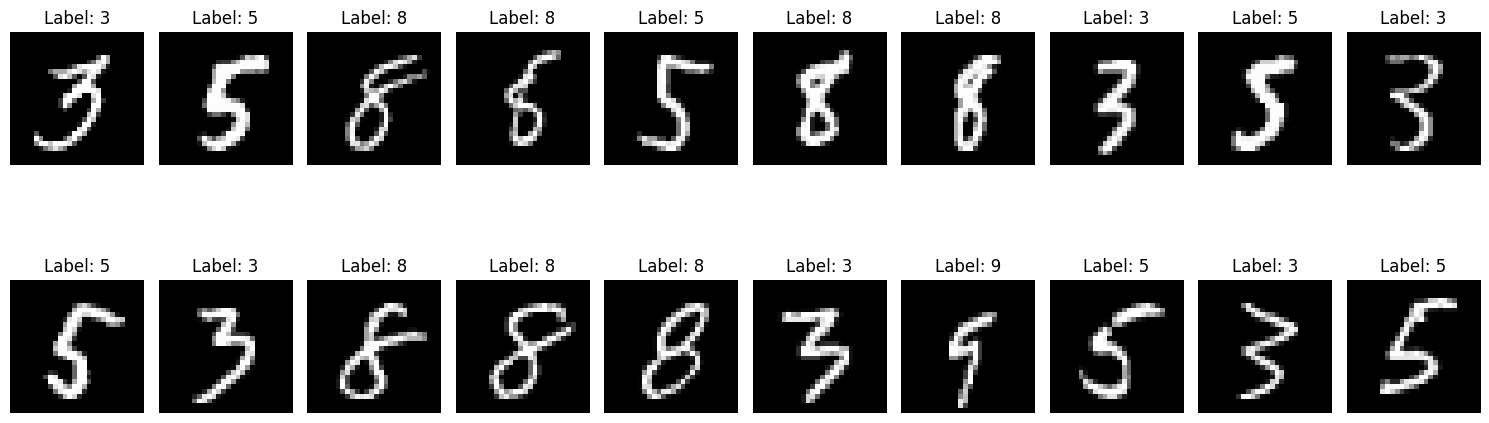


Analysis of mixed neurons complete.


In [26]:
# Visualizing a subset of these images
num_images_to_visualize = min(len(data_indices), 20) # Visualize up to 20 images
print(f"  Displaying {num_images_to_visualize} sample images from this neuron...")

fig, axes = plt.subplots(2, num_images_to_visualize // 2, figsize=(15, 6))
axes = axes.flatten()

# Selecting a subset of indices to display
display_indices = np.random.choice(len(data_indices), num_images_to_visualize, replace=False)

for i, ax in enumerate(axes):
  original_data_index = data_indices[display_indices[i]]
  img = X[original_data_index].reshape(28, 28)
  ax.imshow(img, cmap='gray')
  ax.set_title(f'Label: {y[original_data_index]}')
  ax.axis('off')

# Move plt.show() outside the loop
plt.tight_layout()
plt.show()

print("\nAnalysis of mixed neurons complete.")

Above code investigates the "mixed" neurons identified in the previous step by visualizing some of the original handwritten digit images that were mapped to these neurons.

**The Image Grid:** For each selected mixed neuron, a grid of images is displayed. Each image is a handwritten digit from the original MNIST dataset that was mapped to that specific neuron. The title above each image shows its original digit label.

By examining these image grids examples of different digits that the SOM grouped together in the same neuron can be visualised. This helps to understand why these neurons were identified as mixed. It is observed that the images, despite having different labels, share some visual similarities or are written in a way that makes them ambiguous, leading the SOM to map them to the same area on the grid. This provides a concrete illustration of the clustering ambiguities captured by the SOM.

## Summary:

### Data Analysis Key Findings
*   The MNIST dataset was successfully loaded directly from OpenML, containing 70,000 samples with 784 features each.
*   The dataset had no missing values.
*   Data scaling was performed using `MinMaxScaler` to the range [0, 1].
*   PCA was applied for dimensionality reduction, reducing the feature count from 784 to 154 while retaining 95% of the variance.
*   The distribution of digit labels in the dataset is relatively uniform.
*   Sample image visualization confirmed the dataset contains 28x28 grayscale handwritten digits.
*   A Self-Organizing Map (SOM) was successfully implemented and trained using the `minisom` library.
*   The trained SOM grid visualized with majority digit labels showed how digits were spatially organized on the map.
*   The U-matrix visualization helped identify potential cluster boundaries on the SOM grid.
*   The clustering performance of the SOM was evaluated using Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI), yielding scores of approximately 0.6611 and 0.6915, respectively.
*   Larger SOM map sizes (15x15) generally resulted in better clustering performance (higher ARI and NMI scores) compared to smaller map sizes (10x10).
*   The parameter combination of a 15x15 map, sigma 1.0, and learning rate 0.5 yielded the highest ARI (0.734208) and NMI (0.749120) among the tested parameters.
*   Neurons on the SOM grid were identified as "mixed" if they contained at least 50 data points from a non-majority digit class. The analysis confirmed the existence of such neurons, indicating clustering ambiguity for certain input images.
*   Visualization of images mapped to mixed neurons showed examples of different digits (e.g., '7' and '9') being grouped together, suggesting visual similarities or ambiguities in the handwritten digits that the SOM captured.
